In [1]:
from agent import DGQNAgent, train, evaluate, evaluate_random_agent
from routing_env import RoutingEnv
import networkx as nx
import torch
import matplotlib.pyplot as plt
import numpy as np

Using backend: pytorch


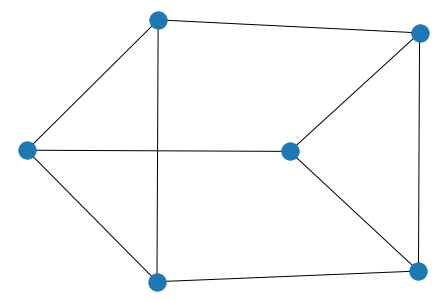

In [3]:
train_G = nx.random_regular_graph(3, 6)
nx.draw(train_G)

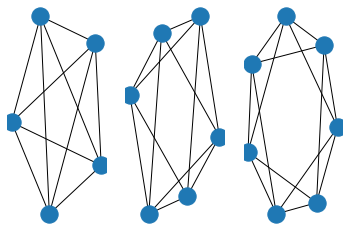

In [4]:
plt.subplot(1,3,1)
test_G_1 = nx.random_regular_graph(4, 5)
nx.draw(test_G_1)
plt.subplot(1,3,2)
test_G_2 = nx.random_regular_graph(4, 6)
nx.draw(test_G_2)
plt.subplot(1,3,3)
test_G_3 = nx.random_regular_graph(4, 7)
nx.draw(test_G_3)

In [5]:
train_env = RoutingEnv(train_G)
test_env_1 = RoutingEnv(test_G_1)
test_env_2 = RoutingEnv(test_G_2)
test_env_3 = RoutingEnv(test_G_3)

In [6]:
initial_train_perf = evaluate_random_agent(train_env)
print("Average score of the untrained agent on the training topology:", initial_train_perf)

100%|██████████| 300/300 [00:12<00:00, 24.80it/s]Average score of the untrained agent on the training topology: 596.48



In [7]:
initial_test_perf_1 = evaluate_random_agent(test_env_1)
print("Average score of the untrained agent on the first test topology:", initial_test_perf_1)

100%|██████████| 300/300 [00:21<00:00, 13.80it/s]Average score of the untrained agent on the first test topology: 894.24



In [9]:
initial_test_perf_2 = evaluate_random_agent(test_env_2)
print("Average score of the untrained agent on the second test topology:", initial_test_perf_2)

100%|██████████| 300/300 [00:26<00:00, 11.45it/s]Average score of the untrained agent on the second test topology: 901.6



In [10]:
initial_test_perf_3 = evaluate_random_agent(test_env_3)
print("Average score of the untrained agent on the second test topology:", initial_test_perf_3)

100%|██████████| 300/300 [00:41<00:00,  7.23it/s]Average score of the untrained agent on the second test topology: 940.96



100%|██████████| 5000/5000 [2:01:06<00:00,  1.45s/it]


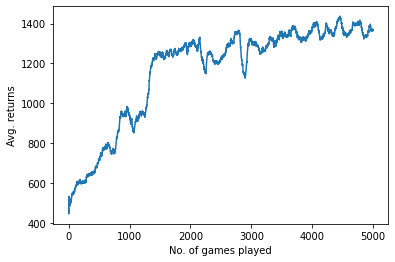

In [13]:
agent = DGQNAgent(train_env.obs_dim, train_env.act_dim, train_env.get_dgl_graph())
agent.set_dgl_graph(train_env.get_dgl_graph())
avg_scores = train(agent, train_env, num_epochs=5000)
plt.plot(np.arange(0,len(avg_scores)), avg_scores)
plt.xlabel('No. of games played')
plt.ylabel('Avg. returns')
plt.show()

In [14]:
final_train_perf = evaluate(agent, train_env)
print("Average score of the untrained agent on the training topology:", final_train_perf)

100%|██████████| 300/300 [00:47<00:00,  6.37it/s]Average score of the untrained agent on the training topology: 864.24



In [15]:
agent.set_dgl_graph(test_env_1.get_dgl_graph())
final_test_perf_1 = evaluate(agent, test_env_1)
print("Average score of the untrained agent on the training topology:", final_test_perf_1)

100%|██████████| 300/300 [01:20<00:00,  3.73it/s]Average score of the untrained agent on the training topology: 1453.52



In [16]:
agent.set_dgl_graph(test_env_2.get_dgl_graph())
final_test_perf_2 = evaluate(agent, test_env_2)
print("Average score of the untrained agent on the training topology:", final_test_perf_2)

100%|██████████| 300/300 [01:57<00:00,  2.55it/s]Average score of the untrained agent on the training topology: 1304.24



In [17]:
agent.set_dgl_graph(test_env_3.get_dgl_graph())
final_test_perf_3 = evaluate(agent, test_env_3)
print("Average score of the untrained agent on the training topology:", final_test_perf_3)

100%|██████████| 300/300 [02:04<00:00,  2.42it/s]Average score of the untrained agent on the training topology: 1199.6



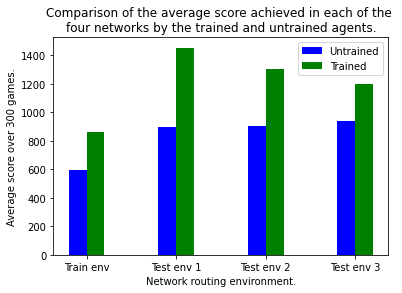

In [37]:
x = np.array([i for i in range(4)])

y = [initial_train_perf, initial_test_perf_1, initial_test_perf_2, initial_test_perf_3]
z = [final_train_perf, final_test_perf_1, final_test_perf_2, final_test_perf_3]

ax = plt.subplot(111)
ax.bar(x-0.1, y, width=0.2, color='b', align='center', label="Untrained")
ax.bar(x+0.1, z, width=0.2, color='g', align='center', label="Trained")
ax.set_xticks(x)
ax.set_xticklabels(["Train env", "Test env 1", "Test env 2", "Test env 3"])
ax.legend()
ax.set_title("Comparison of the average score achieved in each of the \nfour networks by the trained and untrained agents.")
ax.set_ylabel("Average score over 300 games.")
ax.set_xlabel("Network routing environment.")

plt.show()